In [9]:
# centroid calculation
import numpy as np
red_point1 = np.array([1, 3])
red_point2 = np.array([2, 5])
red_point3 = np.array([3, 4])
red_center = (red_point1 + red_point2 + red_point3) / 3.

red_center

array([ 2.,  4.])

In [10]:
import pandas as pd

# import the beer dataset
url = 'C:/Users/admin/Documents/GitHub/python-ds-book/data/beer.txt'
beer = pd.read_csv(url, sep=' ')
print beer.shape

(20, 5)


In [11]:
# define X
X = beer.drop('name', axis=1)

In [12]:
# K-means with 3 clusters
from sklearn.cluster import KMeans
km = KMeans(n_clusters=3, random_state=1)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

In [13]:
# save the cluster labels and sort by cluster
beer['cluster'] = km.labels_

In [14]:
# calculate the mean of each feature for each cluster
beer.groupby('cluster').mean()

,calories,sodium,alcohol,cost
cluster,,,,
0,150.00,17.0,4.521429,0.520714
1,102.75,10.0,4.075000,0.440000
2,70.00,10.5,2.600000,0.420000


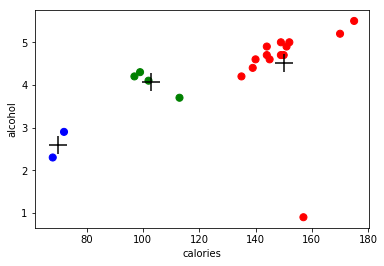

In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

# save the DataFrame of cluster centers
centers = beer.groupby('cluster').mean()
# create a "colors" array for plotting
colors = np.array(['red', 'green', 'blue', 'yellow'])
# scatter plot of calories versus alcohol, colored by cluster (0=red, 1=green, 2=blue)
plt.scatter(beer.calories, beer.alcohol, c=colors[list(beer.cluster)], s=50)

# cluster centers, marked by "+"
plt.scatter(centers.calories, centers.alcohol, linewidths=3,
marker='+', s=300, c='black')

# add labels
plt.xlabel('calories')
plt.ylabel('alcohol')

In [16]:
# calculate Silhouette Coefficient for K=3
from sklearn import metrics
metrics.silhouette_score(X, km.labels_)

0.67317750464557957

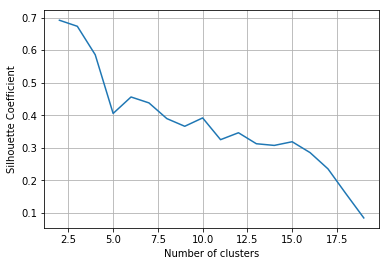

In [21]:
# calculate SC for K=2 through K=19

k_range = range(2, 20)
scores = []
for k in k_range:
    km = KMeans(n_clusters=k, random_state=1)
    km.fit(X)
    scores.append(metrics.silhouette_score(X, km.labels_))

# plot the results
plt.plot(k_range, scores)
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Coefficient')
plt.grid(True)

In [19]:
# center and scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# K-means with 3 clusters on scaled data
km = KMeans(n_clusters=3, random_state=1)
km.fit(X_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)